# Quick Introduction to PyTorch

- First, if you are totally new to Python Programming, quickly read this book: [your journey to fluent python](https://github.com/pro1code1hack/Your-Journey-To-Fluent-Python)

- PyTorch is python-based Deep Learning Library for develop models. To learn the basics of PyTorch, you can go to the tutorial page in [PyTorch website](https://pytorch.org/tutorials/beginner/basics/intro.html).

- Also, you can check the basic_pytorch_exercise.ipynb file to see matrices multiplication and addition


In [1]:
# import all the libraries required

from pprint import pprint
import os
from pathlib import Path
import random
import numpy as np
from tqdm import tqdm
import joblib
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# imort our own module
from preprocessing import PreprocessEmail as pr


# import spacy

In [2]:
# for replicability

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Part I: Reading and Proprocessing Data


In [3]:
current_dir = os.getcwd()
# print("curr dir = ", current_dir)
# access parent folder
parent_folder = Path(current_dir).absolute().parent
# print(parent_folder)

dataset_folder = os.path.join(parent_folder, "phishing-email-dataset")


# smishing_file_path = os.path.join(
#     dataset_folder, "smssmishcollection/SMSSmishCollection.txt"
# )

# print(smishing_file_path)

# df = read_smish_data(smishing_file_path)
# # # df["clean_text"] = df["sms_message"].apply(clean_text)

# corpus = df["sms_message"].tolist()
# cleaned_corpus = [clean_text(doc) for doc in corpus]
# df["clean_text"] = cleaned_corpus
# print(cleaned_corpus[:10])

In [4]:
os.listdir(dataset_folder)

['.DS_Store', '8339691.zip', 'smssmishcollection', '8339691']

In [5]:
# os.listdir(dataset_folder + "/" + "8339691/")

In [6]:
phish_file_path = os.path.join(dataset_folder, "8339691/Nazario_5.csv")

df = pd.read_csv(phish_file_path)
df.head(5)

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip..."
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,[]
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0,['http://eastpower.dev.corp.enron.com/summary/...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,[]
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,[]


In [7]:
corpus = df["body"].tolist()
cleaned_corpus = [pr.clean_email(doc) for doc in corpus]
df["clean_text"] = cleaned_corpus
df.head(5)

,sender,receiver,date,subject,body,label,urls,clean_text
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip...",user id enrondlr pw bnaweb original message fr...
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,[],hi chris tonight we are rolling out new repor...
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0,['http://eastpower.dev.corp.enron.com/summary/...,rika these new original message from thomas pa...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,[],johngerald we are currently trading under gtc ...
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,[],gerald and stacy attached is worksheet for new...


In [8]:
# Check the number of rows / samples in our dataset
len(df)

3065

In [9]:
df["label"].value_counts()

label
1    1565
0    1500
Name: count, dtype: int64

In [10]:
# print(df["body"].tolist())

In [11]:
# uncomment this to can see one of the cleaned emails
pprint(df["clean_text"].tolist()[:1][0])

('user id enrondlr pw bnaweb original message from bna highlights '
 'bhighligbnacom sent thursday june pm to bna highlights subject june bna inc '
 'daily labor report daily labor report highlights table of contents june issn '
 'registered web subscribers can access the full text of these articles by '
 'using the url link supplied information about becoming subscriber or signing '
 'up for free web trial is available at httpwebbnacom or call bna customer '
 'relations at mon fri am pm et highlights dc circuit overturns nlrb decision '
 'on workplace conduct policies california firms two workplace policies '
 'barring abusive and threatening language and restricting solicitation and '
 'distribution did not constitute unfair labor practices the district of '
 'columbia circuit rules overturning national labor relations board decision '
 'adtranz abb daimlerbenz transp na inc nlrb dc cir no the board held the '
 'workplace conduct policies of adtranz abb daimlerbenz transportation na 

# Part II: Feature Extraction: Begginer-level

- In this part, we will use, CountVectorizer, a very basic feature extraction technique for Natural Language Processing (NLP) tasks.


In [12]:
# Spacy tokenizer
# Load Spacy model


# def spacy_tokenizer(sentence):
#     nlp = spacy.load("en_core_web_sm")
#     nlp.max_length = 3_642_984 + 1  # max length af a text
#     return [word.lemma_ for word in nlp(sentence)]

In [13]:
# A simple corpus (NLP data) with three sentences / texts to show how CountVectorizer works. It counts the number of occurances of a word in a setence or entry (row).

corpus = [
    "His computer was hacked.",
    "also noticed that security is also important",
    "why are emails used for phishing attack?",
]

# Create a Vectorizer Object
vectorizer = CountVectorizer(lowercase=True)

# Learn the vocabulary dictionary and return document-term matrix.
X = vectorizer.fit_transform(corpus)

# Check the fitted vocabulary
print("Vocabulary: ", vectorizer.get_feature_names_out())

# Check the vectorized data
print("Encoded Document is:\n", X.toarray())

Vocabulary:  ['also' 'are' 'attack' 'computer' 'emails' 'for' 'hacked' 'his'
 'important' 'is' 'noticed' 'phishing' 'security' 'that' 'used' 'was'
 'why']
Encoded Document is:
 [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1]]


In [14]:
# import warnings

# warnings.filterwarnings("ignore")
# Load English tokenizer, tagger, parser, NER and word vectors
# nlp = spacy.load("en_core_web_sm")
# nlp.max_length = 3642984 + 1
# # Get the list of stop words
# stop_words = nlp.Defaults.stop_words

# Print the stop words
# print(stop_words)

# Now, simlar to the simple three documents-based feature, we will extract features using CountVectorizer from our phishing email dataset.

vectorizer = CountVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=20,
)

# get all the cleaned emails
email_corpus = df["clean_text"].tolist()

# Learn the vocabulary dictionary and return document-term matrix.
X = vectorizer.fit_transform(email_corpus)

# convert X from scipy sparse matrix to numpy matrix
print("Before conversion, X was ", type(X))

X = X.toarray()
print("After conversion, X is = ", type(X))  # now it is a numpy array

Before conversion, X was  <class 'scipy.sparse._csr.csr_matrix'>
After conversion, X is =  <class 'numpy.ndarray'>


In [15]:
# get all the cleaned emails
# email_corpus = df["clean_text"].tolist()
# l = []
# for i, mail in enumerate(email_corpus):
#     # print(i, len(mail))
#     l.append(len(mail))

# max(l)

In [16]:
X.shape  # X has 3065 rows and 3781 (vocabularies or features)

(3065, 1889)

In [17]:
X.max()

1060

In [18]:
# read the labels of the emails: if label = 0, the email was benign, if label = 1, the email is phishy / malicious email

y = df["label"].astype(np.int32)

# check the number of benign and malicious emails
y.value_counts()  # we can see that we have 1565 malicious and 1500 normal emails

label
1    1565
0    1500
Name: count, dtype: int64

In [19]:
# split our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [20]:
# normalize our data between 0 and 1
# Min-Max Scaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [21]:
# Check the fitted vocabulary
vocabularies = vectorizer.get_feature_names_out()
print(vocabularies)

['ability' 'able' 'accept' ... 'youusaa' 'youve' 'zone']


In [22]:
# check the total number of vocabularies or unique features we have in our data
len(vocabularies)

1889

In [23]:
# now, we will create a pytorch sensor for training and testing dataset
# This is useful when we have huge data with over 1 Million rows, and cannot fit our computer's RAM. The data loader fetches it based on the batch_size specified.

train_dataset = TensorDataset(
    torch.from_numpy(X_train_scaled), torch.from_numpy(y_train.values).long()
)
test_dataset = TensorDataset(
    torch.from_numpy(X_test_scaled), torch.from_numpy(y_test.values).long()
)

# create data loaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [24]:
# check if body of the email is empty or if label is empty
df[["body"]].isna().sum()

body    0
dtype: int64

In [25]:
df["label"].isna().sum()

0

# Part III: PyTorch Model Implementation (begginer level)

- In this part, we will use, Single Layer Perceptron to perform binary clasification of emails (i.e., classify emails as benign or malicious / phishing). Embedding a widely used feature extraction technique for Natural Language Processing (NLP) tasks.

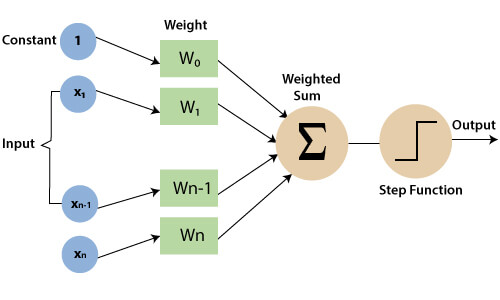 or 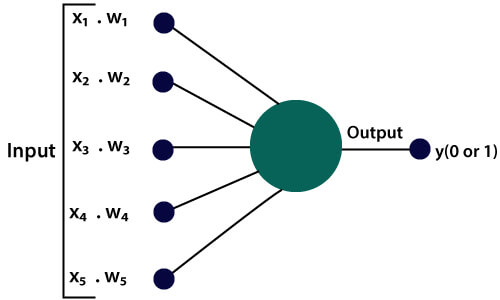

Single-Layer Perceptron architecture: figure is take from [javatpoint](https://www.javatpoint.com/pytorch-perceptron)


In [26]:
# look the implementation of a simple pytorch model / classifier in models.py file

from models import Perceptron

In [27]:
# set the hyperparameters

input_size = X.shape[1]  # number of features/ vocabulary in our data, X
output_size = 1

classifier = Perceptron(input_size, output_size)

# create an optimizer for training classifier
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

# create a loss function to calculate the loss (error) of our classifier
loss_fn = nn.BCELoss()

print(classifier)

Perceptron(
  (fc): Linear(in_features=1889, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


```
Note: As you can see, our classifier has in_features = 1889, and out_features = 1, followed by sigmoid function. The sigmoid function squashes the output value between 0 and 1. Now, if the output of the sigmoid is close to 0, we say the email is normal. If the output of the sigmoid is close to 1, we say that the email is malicious / phishy.
```


In [28]:
# implement the training function of our email classier
def train_classifier(classifier, optimizer, loss_fn, train_loader, epochs=20):
    training_losses = []
    # training_f1_scores = []

    for epoch in range(epochs):
        print(f"Epoch: {epoch + 1} / {epochs}")
        loss_ = 0.0
        # f1_score_ = 0.0
        for data, labels in tqdm(train_loader):
            # print(labels.shape)
            data = data.float()
            # print(data.max())
            y = labels.long().float()
            # train the classifier
            optimizer.zero_grad()
            # performs sigmoid (torch.matmul(X.T, W) + b) and returns output
            preds = classifier(data)

            # computes the loss function
            # print(preds.max(), y.max())
            loss = loss_fn(preds, y)
            loss.backward()  # compute gradients using back propagation.

            # update the classifier's weights (W) and bia(sb)
            optimizer.step()

            loss_ += loss.item()
            # f1_score_ += f1_score(y.cpu().detach().numpy(), preds.cpu().detach().numpy())
        loss_ = loss_ / len(train_loader)
        training_losses.append(loss_)
        print(f"Train Loss = { loss_:.4f}")

    return training_losses


# train the classifier
EPOCHS = 500
training_losses = train_classifier(
    classifier, optimizer, loss_fn, train_loader, epochs=EPOCHS
)

Epoch: 1 / 500


100%|██████████| 9/9 [00:00<00:00, 87.10it/s]


Train Loss = 0.6835
Epoch: 2 / 500


100%|██████████| 9/9 [00:00<00:00, 502.37it/s]


Train Loss = 0.6646
Epoch: 3 / 500


100%|██████████| 9/9 [00:00<00:00, 459.19it/s]


Train Loss = 0.6473
Epoch: 4 / 500


100%|██████████| 9/9 [00:00<00:00, 457.99it/s]


Train Loss = 0.6326
Epoch: 5 / 500


100%|██████████| 9/9 [00:00<00:00, 490.03it/s]


Train Loss = 0.6186
Epoch: 6 / 500


100%|██████████| 9/9 [00:00<00:00, 494.18it/s]


Train Loss = 0.6050
Epoch: 7 / 500


100%|██████████| 9/9 [00:00<00:00, 233.08it/s]


Train Loss = 0.5929
Epoch: 8 / 500


100%|██████████| 9/9 [00:00<00:00, 352.87it/s]


Train Loss = 0.5805
Epoch: 9 / 500


100%|██████████| 9/9 [00:00<00:00, 451.60it/s]


Train Loss = 0.5717
Epoch: 10 / 500


100%|██████████| 9/9 [00:00<00:00, 413.15it/s]


Train Loss = 0.5593
Epoch: 11 / 500


100%|██████████| 9/9 [00:00<00:00, 448.03it/s]


Train Loss = 0.5514
Epoch: 12 / 500


100%|██████████| 9/9 [00:00<00:00, 464.68it/s]


Train Loss = 0.5413
Epoch: 13 / 500


100%|██████████| 9/9 [00:00<00:00, 246.15it/s]


Train Loss = 0.5338
Epoch: 14 / 500


100%|██████████| 9/9 [00:00<00:00, 210.85it/s]


Train Loss = 0.5252
Epoch: 15 / 500


100%|██████████| 9/9 [00:00<00:00, 436.53it/s]


Train Loss = 0.5155
Epoch: 16 / 500


100%|██████████| 9/9 [00:00<00:00, 467.14it/s]


Train Loss = 0.5083
Epoch: 17 / 500


100%|██████████| 9/9 [00:00<00:00, 474.79it/s]


Train Loss = 0.5018
Epoch: 18 / 500


100%|██████████| 9/9 [00:00<00:00, 421.15it/s]


Train Loss = 0.4938
Epoch: 19 / 500


100%|██████████| 9/9 [00:00<00:00, 469.51it/s]


Train Loss = 0.4871
Epoch: 20 / 500


100%|██████████| 9/9 [00:00<00:00, 456.48it/s]


Train Loss = 0.4812
Epoch: 21 / 500


100%|██████████| 9/9 [00:00<00:00, 451.19it/s]


Train Loss = 0.4718
Epoch: 22 / 500


100%|██████████| 9/9 [00:00<00:00, 212.23it/s]


Train Loss = 0.4657
Epoch: 23 / 500


100%|██████████| 9/9 [00:00<00:00, 403.13it/s]


Train Loss = 0.4637
Epoch: 24 / 500


100%|██████████| 9/9 [00:00<00:00, 534.47it/s]


Train Loss = 0.4550
Epoch: 25 / 500


100%|██████████| 9/9 [00:00<00:00, 497.70it/s]


Train Loss = 0.4507
Epoch: 26 / 500


100%|██████████| 9/9 [00:00<00:00, 470.64it/s]


Train Loss = 0.4460
Epoch: 27 / 500


100%|██████████| 9/9 [00:00<00:00, 359.90it/s]


Train Loss = 0.4407
Epoch: 28 / 500


100%|██████████| 9/9 [00:00<00:00, 459.86it/s]


Train Loss = 0.4330
Epoch: 29 / 500


100%|██████████| 9/9 [00:00<00:00, 421.05it/s]


Train Loss = 0.4301
Epoch: 30 / 500


100%|██████████| 9/9 [00:00<00:00, 386.60it/s]


Train Loss = 0.4262
Epoch: 31 / 500


100%|██████████| 9/9 [00:00<00:00, 521.35it/s]


Train Loss = 0.4204
Epoch: 32 / 500


100%|██████████| 9/9 [00:00<00:00, 450.30it/s]


Train Loss = 0.4152
Epoch: 33 / 500


100%|██████████| 9/9 [00:00<00:00, 432.73it/s]


Train Loss = 0.4120
Epoch: 34 / 500


100%|██████████| 9/9 [00:00<00:00, 438.38it/s]


Train Loss = 0.4076
Epoch: 35 / 500


100%|██████████| 9/9 [00:00<00:00, 415.76it/s]


Train Loss = 0.4025
Epoch: 36 / 500


100%|██████████| 9/9 [00:00<00:00, 456.29it/s]


Train Loss = 0.3996
Epoch: 37 / 500


100%|██████████| 9/9 [00:00<00:00, 202.76it/s]


Train Loss = 0.3968
Epoch: 38 / 500


100%|██████████| 9/9 [00:00<00:00, 472.14it/s]


Train Loss = 0.3887
Epoch: 39 / 500


100%|██████████| 9/9 [00:00<00:00, 475.06it/s]


Train Loss = 0.3886
Epoch: 40 / 500


100%|██████████| 9/9 [00:00<00:00, 456.42it/s]


Train Loss = 0.3799
Epoch: 41 / 500


100%|██████████| 9/9 [00:00<00:00, 419.82it/s]


Train Loss = 0.3798
Epoch: 42 / 500


100%|██████████| 9/9 [00:00<00:00, 493.55it/s]


Train Loss = 0.3779
Epoch: 43 / 500


100%|██████████| 9/9 [00:00<00:00, 504.99it/s]


Train Loss = 0.3724
Epoch: 44 / 500


100%|██████████| 9/9 [00:00<00:00, 480.72it/s]


Train Loss = 0.3675
Epoch: 45 / 500


100%|██████████| 9/9 [00:00<00:00, 484.83it/s]


Train Loss = 0.3670
Epoch: 46 / 500


100%|██████████| 9/9 [00:00<00:00, 511.72it/s]


Train Loss = 0.3666
Epoch: 47 / 500


100%|██████████| 9/9 [00:00<00:00, 479.31it/s]


Train Loss = 0.3583
Epoch: 48 / 500


100%|██████████| 9/9 [00:00<00:00, 513.93it/s]


Train Loss = 0.3565
Epoch: 49 / 500


100%|██████████| 9/9 [00:00<00:00, 295.21it/s]


Train Loss = 0.3520
Epoch: 50 / 500


100%|██████████| 9/9 [00:00<00:00, 296.11it/s]


Train Loss = 0.3523
Epoch: 51 / 500


100%|██████████| 9/9 [00:00<00:00, 296.91it/s]


Train Loss = 0.3461
Epoch: 52 / 500


100%|██████████| 9/9 [00:00<00:00, 355.49it/s]


Train Loss = 0.3431
Epoch: 53 / 500


100%|██████████| 9/9 [00:00<00:00, 366.49it/s]


Train Loss = 0.3415
Epoch: 54 / 500


100%|██████████| 9/9 [00:00<00:00, 490.59it/s]


Train Loss = 0.3381
Epoch: 55 / 500


100%|██████████| 9/9 [00:00<00:00, 465.04it/s]


Train Loss = 0.3398
Epoch: 56 / 500


100%|██████████| 9/9 [00:00<00:00, 453.15it/s]


Train Loss = 0.3321
Epoch: 57 / 500


100%|██████████| 9/9 [00:00<00:00, 450.34it/s]


Train Loss = 0.3307
Epoch: 58 / 500


100%|██████████| 9/9 [00:00<00:00, 482.42it/s]


Train Loss = 0.3299
Epoch: 59 / 500


100%|██████████| 9/9 [00:00<00:00, 473.99it/s]


Train Loss = 0.3240
Epoch: 60 / 500


100%|██████████| 9/9 [00:00<00:00, 496.19it/s]


Train Loss = 0.3242
Epoch: 61 / 500


100%|██████████| 9/9 [00:00<00:00, 441.70it/s]


Train Loss = 0.3201
Epoch: 62 / 500


100%|██████████| 9/9 [00:00<00:00, 494.66it/s]


Train Loss = 0.3146
Epoch: 63 / 500


100%|██████████| 9/9 [00:00<00:00, 491.10it/s]


Train Loss = 0.3148
Epoch: 64 / 500


100%|██████████| 9/9 [00:00<00:00, 565.68it/s]


Train Loss = 0.3134
Epoch: 65 / 500


100%|██████████| 9/9 [00:00<00:00, 481.46it/s]


Train Loss = 0.3111
Epoch: 66 / 500


100%|██████████| 9/9 [00:00<00:00, 464.37it/s]


Train Loss = 0.3085
Epoch: 67 / 500


100%|██████████| 9/9 [00:00<00:00, 453.54it/s]


Train Loss = 0.3076
Epoch: 68 / 500


100%|██████████| 9/9 [00:00<00:00, 527.16it/s]


Train Loss = 0.3033
Epoch: 69 / 500


100%|██████████| 9/9 [00:00<00:00, 512.68it/s]


Train Loss = 0.3047
Epoch: 70 / 500


100%|██████████| 9/9 [00:00<00:00, 492.39it/s]


Train Loss = 0.3042
Epoch: 71 / 500


100%|██████████| 9/9 [00:00<00:00, 487.44it/s]


Train Loss = 0.2978
Epoch: 72 / 500


100%|██████████| 9/9 [00:00<00:00, 520.72it/s]


Train Loss = 0.2992
Epoch: 73 / 500


100%|██████████| 9/9 [00:00<00:00, 454.71it/s]


Train Loss = 0.2969
Epoch: 74 / 500


100%|██████████| 9/9 [00:00<00:00, 489.37it/s]


Train Loss = 0.2925
Epoch: 75 / 500


100%|██████████| 9/9 [00:00<00:00, 445.17it/s]


Train Loss = 0.2922
Epoch: 76 / 500


100%|██████████| 9/9 [00:00<00:00, 497.60it/s]


Train Loss = 0.2889
Epoch: 77 / 500


100%|██████████| 9/9 [00:00<00:00, 476.24it/s]


Train Loss = 0.2867
Epoch: 78 / 500


100%|██████████| 9/9 [00:00<00:00, 506.18it/s]


Train Loss = 0.2865
Epoch: 79 / 500


100%|██████████| 9/9 [00:00<00:00, 563.66it/s]


Train Loss = 0.2831
Epoch: 80 / 500


100%|██████████| 9/9 [00:00<00:00, 491.89it/s]


Train Loss = 0.2813
Epoch: 81 / 500


100%|██████████| 9/9 [00:00<00:00, 474.71it/s]


Train Loss = 0.2808
Epoch: 82 / 500


100%|██████████| 9/9 [00:00<00:00, 445.30it/s]


Train Loss = 0.2771
Epoch: 83 / 500


100%|██████████| 9/9 [00:00<00:00, 498.95it/s]


Train Loss = 0.2760
Epoch: 84 / 500


100%|██████████| 9/9 [00:00<00:00, 490.25it/s]


Train Loss = 0.2736
Epoch: 85 / 500


100%|██████████| 9/9 [00:00<00:00, 488.42it/s]


Train Loss = 0.2723
Epoch: 86 / 500


100%|██████████| 9/9 [00:00<00:00, 314.04it/s]


Train Loss = 0.2695
Epoch: 87 / 500


100%|██████████| 9/9 [00:00<00:00, 105.78it/s]


Train Loss = 0.2704
Epoch: 88 / 500


100%|██████████| 9/9 [00:00<00:00, 467.34it/s]


Train Loss = 0.2666
Epoch: 89 / 500


100%|██████████| 9/9 [00:00<00:00, 447.47it/s]


Train Loss = 0.2655
Epoch: 90 / 500


100%|██████████| 9/9 [00:00<00:00, 401.25it/s]


Train Loss = 0.2623
Epoch: 91 / 500


100%|██████████| 9/9 [00:00<00:00, 374.35it/s]


Train Loss = 0.2620
Epoch: 92 / 500


100%|██████████| 9/9 [00:00<00:00, 445.52it/s]


Train Loss = 0.2627
Epoch: 93 / 500


100%|██████████| 9/9 [00:00<00:00, 458.72it/s]


Train Loss = 0.2595
Epoch: 94 / 500


100%|██████████| 9/9 [00:00<00:00, 443.44it/s]


Train Loss = 0.2606
Epoch: 95 / 500


100%|██████████| 9/9 [00:00<00:00, 450.82it/s]


Train Loss = 0.2554
Epoch: 96 / 500


100%|██████████| 9/9 [00:00<00:00, 440.21it/s]


Train Loss = 0.2558
Epoch: 97 / 500


100%|██████████| 9/9 [00:00<00:00, 419.11it/s]


Train Loss = 0.2543
Epoch: 98 / 500


100%|██████████| 9/9 [00:00<00:00, 477.17it/s]


Train Loss = 0.2530
Epoch: 99 / 500


100%|██████████| 9/9 [00:00<00:00, 464.39it/s]


Train Loss = 0.2502
Epoch: 100 / 500


100%|██████████| 9/9 [00:00<00:00, 513.20it/s]


Train Loss = 0.2512
Epoch: 101 / 500


100%|██████████| 9/9 [00:00<00:00, 475.62it/s]


Train Loss = 0.2467
Epoch: 102 / 500


100%|██████████| 9/9 [00:00<00:00, 414.19it/s]


Train Loss = 0.2473
Epoch: 103 / 500


100%|██████████| 9/9 [00:00<00:00, 471.94it/s]


Train Loss = 0.2480
Epoch: 104 / 500


100%|██████████| 9/9 [00:00<00:00, 415.59it/s]


Train Loss = 0.2470
Epoch: 105 / 500


100%|██████████| 9/9 [00:00<00:00, 502.82it/s]


Train Loss = 0.2426
Epoch: 106 / 500


100%|██████████| 9/9 [00:00<00:00, 491.56it/s]


Train Loss = 0.2422
Epoch: 107 / 500


100%|██████████| 9/9 [00:00<00:00, 486.25it/s]


Train Loss = 0.2419
Epoch: 108 / 500


100%|██████████| 9/9 [00:00<00:00, 479.43it/s]


Train Loss = 0.2427
Epoch: 109 / 500


100%|██████████| 9/9 [00:00<00:00, 180.87it/s]


Train Loss = 0.2393
Epoch: 110 / 500


100%|██████████| 9/9 [00:00<00:00, 336.02it/s]


Train Loss = 0.2358
Epoch: 111 / 500


100%|██████████| 9/9 [00:00<00:00, 451.88it/s]


Train Loss = 0.2325
Epoch: 112 / 500


100%|██████████| 9/9 [00:00<00:00, 449.50it/s]


Train Loss = 0.2328
Epoch: 113 / 500


100%|██████████| 9/9 [00:00<00:00, 446.79it/s]


Train Loss = 0.2335
Epoch: 114 / 500


100%|██████████| 9/9 [00:00<00:00, 492.40it/s]


Train Loss = 0.2335
Epoch: 115 / 500


100%|██████████| 9/9 [00:00<00:00, 512.88it/s]


Train Loss = 0.2311
Epoch: 116 / 500


100%|██████████| 9/9 [00:00<00:00, 471.28it/s]


Train Loss = 0.2271
Epoch: 117 / 500


100%|██████████| 9/9 [00:00<00:00, 496.94it/s]


Train Loss = 0.2305
Epoch: 118 / 500


100%|██████████| 9/9 [00:00<00:00, 473.04it/s]


Train Loss = 0.2287
Epoch: 119 / 500


100%|██████████| 9/9 [00:00<00:00, 481.51it/s]


Train Loss = 0.2273
Epoch: 120 / 500


100%|██████████| 9/9 [00:00<00:00, 461.16it/s]


Train Loss = 0.2241
Epoch: 121 / 500


100%|██████████| 9/9 [00:00<00:00, 478.14it/s]


Train Loss = 0.2229
Epoch: 122 / 500


100%|██████████| 9/9 [00:00<00:00, 459.77it/s]


Train Loss = 0.2231
Epoch: 123 / 500


100%|██████████| 9/9 [00:00<00:00, 473.86it/s]


Train Loss = 0.2218
Epoch: 124 / 500


100%|██████████| 9/9 [00:00<00:00, 453.38it/s]


Train Loss = 0.2222
Epoch: 125 / 500


100%|██████████| 9/9 [00:00<00:00, 420.21it/s]


Train Loss = 0.2227
Epoch: 126 / 500


100%|██████████| 9/9 [00:00<00:00, 444.44it/s]


Train Loss = 0.2174
Epoch: 127 / 500


100%|██████████| 9/9 [00:00<00:00, 513.37it/s]


Train Loss = 0.2189
Epoch: 128 / 500


100%|██████████| 9/9 [00:00<00:00, 463.51it/s]


Train Loss = 0.2167
Epoch: 129 / 500


100%|██████████| 9/9 [00:00<00:00, 455.12it/s]


Train Loss = 0.2141
Epoch: 130 / 500


100%|██████████| 9/9 [00:00<00:00, 456.79it/s]


Train Loss = 0.2147
Epoch: 131 / 500


100%|██████████| 9/9 [00:00<00:00, 482.35it/s]


Train Loss = 0.2171
Epoch: 132 / 500


100%|██████████| 9/9 [00:00<00:00, 459.74it/s]


Train Loss = 0.2116
Epoch: 133 / 500


100%|██████████| 9/9 [00:00<00:00, 421.11it/s]


Train Loss = 0.2133
Epoch: 134 / 500


100%|██████████| 9/9 [00:00<00:00, 475.76it/s]


Train Loss = 0.2121
Epoch: 135 / 500


100%|██████████| 9/9 [00:00<00:00, 475.31it/s]


Train Loss = 0.2098
Epoch: 136 / 500


100%|██████████| 9/9 [00:00<00:00, 410.71it/s]


Train Loss = 0.2123
Epoch: 137 / 500


100%|██████████| 9/9 [00:00<00:00, 500.14it/s]


Train Loss = 0.2113
Epoch: 138 / 500


100%|██████████| 9/9 [00:00<00:00, 471.45it/s]


Train Loss = 0.2083
Epoch: 139 / 500


100%|██████████| 9/9 [00:00<00:00, 460.97it/s]


Train Loss = 0.2059
Epoch: 140 / 500


100%|██████████| 9/9 [00:00<00:00, 406.08it/s]


Train Loss = 0.2055
Epoch: 141 / 500


100%|██████████| 9/9 [00:00<00:00, 382.49it/s]


Train Loss = 0.2064
Epoch: 142 / 500


100%|██████████| 9/9 [00:00<00:00, 506.47it/s]


Train Loss = 0.2039
Epoch: 143 / 500


100%|██████████| 9/9 [00:00<00:00, 458.34it/s]


Train Loss = 0.2048
Epoch: 144 / 500


100%|██████████| 9/9 [00:00<00:00, 490.26it/s]


Train Loss = 0.2025
Epoch: 145 / 500


100%|██████████| 9/9 [00:00<00:00, 491.50it/s]


Train Loss = 0.2006
Epoch: 146 / 500


100%|██████████| 9/9 [00:00<00:00, 475.61it/s]


Train Loss = 0.2011
Epoch: 147 / 500


100%|██████████| 9/9 [00:00<00:00, 473.49it/s]


Train Loss = 0.2014
Epoch: 148 / 500


100%|██████████| 9/9 [00:00<00:00, 439.97it/s]


Train Loss = 0.1983
Epoch: 149 / 500


100%|██████████| 9/9 [00:00<00:00, 521.07it/s]


Train Loss = 0.1999
Epoch: 150 / 500


100%|██████████| 9/9 [00:00<00:00, 536.64it/s]


Train Loss = 0.1974
Epoch: 151 / 500


100%|██████████| 9/9 [00:00<00:00, 450.99it/s]


Train Loss = 0.1966
Epoch: 152 / 500


100%|██████████| 9/9 [00:00<00:00, 464.95it/s]


Train Loss = 0.1974
Epoch: 153 / 500


100%|██████████| 9/9 [00:00<00:00, 543.58it/s]


Train Loss = 0.1956
Epoch: 154 / 500


100%|██████████| 9/9 [00:00<00:00, 504.79it/s]


Train Loss = 0.1938
Epoch: 155 / 500


100%|██████████| 9/9 [00:00<00:00, 512.65it/s]


Train Loss = 0.1942
Epoch: 156 / 500


100%|██████████| 9/9 [00:00<00:00, 515.79it/s]


Train Loss = 0.1916
Epoch: 157 / 500


100%|██████████| 9/9 [00:00<00:00, 479.08it/s]


Train Loss = 0.1892
Epoch: 158 / 500


100%|██████████| 9/9 [00:00<00:00, 484.26it/s]


Train Loss = 0.1900
Epoch: 159 / 500


100%|██████████| 9/9 [00:00<00:00, 409.86it/s]


Train Loss = 0.1870
Epoch: 160 / 500


100%|██████████| 9/9 [00:00<00:00, 451.73it/s]


Train Loss = 0.1884
Epoch: 161 / 500


100%|██████████| 9/9 [00:00<00:00, 500.47it/s]


Train Loss = 0.1900
Epoch: 162 / 500


100%|██████████| 9/9 [00:00<00:00, 484.62it/s]


Train Loss = 0.1893
Epoch: 163 / 500


100%|██████████| 9/9 [00:00<00:00, 422.51it/s]


Train Loss = 0.1861
Epoch: 164 / 500


100%|██████████| 9/9 [00:00<00:00, 539.18it/s]


Train Loss = 0.1834
Epoch: 165 / 500


100%|██████████| 9/9 [00:00<00:00, 506.52it/s]


Train Loss = 0.1849
Epoch: 166 / 500


100%|██████████| 9/9 [00:00<00:00, 475.04it/s]


Train Loss = 0.1856
Epoch: 167 / 500


100%|██████████| 9/9 [00:00<00:00, 465.43it/s]


Train Loss = 0.1828
Epoch: 168 / 500


100%|██████████| 9/9 [00:00<00:00, 450.69it/s]


Train Loss = 0.1856
Epoch: 169 / 500


100%|██████████| 9/9 [00:00<00:00, 467.36it/s]


Train Loss = 0.1818
Epoch: 170 / 500


100%|██████████| 9/9 [00:00<00:00, 479.84it/s]


Train Loss = 0.1825
Epoch: 171 / 500


100%|██████████| 9/9 [00:00<00:00, 476.01it/s]


Train Loss = 0.1795
Epoch: 172 / 500


100%|██████████| 9/9 [00:00<00:00, 503.34it/s]


Train Loss = 0.1811
Epoch: 173 / 500


100%|██████████| 9/9 [00:00<00:00, 482.06it/s]


Train Loss = 0.1790
Epoch: 174 / 500


100%|██████████| 9/9 [00:00<00:00, 483.97it/s]


Train Loss = 0.1802
Epoch: 175 / 500


100%|██████████| 9/9 [00:00<00:00, 425.33it/s]


Train Loss = 0.1781
Epoch: 176 / 500


100%|██████████| 9/9 [00:00<00:00, 449.06it/s]


Train Loss = 0.1763
Epoch: 177 / 500


100%|██████████| 9/9 [00:00<00:00, 493.91it/s]


Train Loss = 0.1746
Epoch: 178 / 500


100%|██████████| 9/9 [00:00<00:00, 473.78it/s]


Train Loss = 0.1766
Epoch: 179 / 500


100%|██████████| 9/9 [00:00<00:00, 402.34it/s]


Train Loss = 0.1769
Epoch: 180 / 500


100%|██████████| 9/9 [00:00<00:00, 479.80it/s]


Train Loss = 0.1746
Epoch: 181 / 500


100%|██████████| 9/9 [00:00<00:00, 498.06it/s]


Train Loss = 0.1742
Epoch: 182 / 500


100%|██████████| 9/9 [00:00<00:00, 424.61it/s]


Train Loss = 0.1739
Epoch: 183 / 500


100%|██████████| 9/9 [00:00<00:00, 481.65it/s]


Train Loss = 0.1739
Epoch: 184 / 500


100%|██████████| 9/9 [00:00<00:00, 477.17it/s]


Train Loss = 0.1731
Epoch: 185 / 500


100%|██████████| 9/9 [00:00<00:00, 394.82it/s]


Train Loss = 0.1722
Epoch: 186 / 500


100%|██████████| 9/9 [00:00<00:00, 467.14it/s]


Train Loss = 0.1708
Epoch: 187 / 500


100%|██████████| 9/9 [00:00<00:00, 440.57it/s]


Train Loss = 0.1692
Epoch: 188 / 500


100%|██████████| 9/9 [00:00<00:00, 500.83it/s]


Train Loss = 0.1694
Epoch: 189 / 500


100%|██████████| 9/9 [00:00<00:00, 503.18it/s]


Train Loss = 0.1696
Epoch: 190 / 500


100%|██████████| 9/9 [00:00<00:00, 467.14it/s]


Train Loss = 0.1690
Epoch: 191 / 500


100%|██████████| 9/9 [00:00<00:00, 472.02it/s]


Train Loss = 0.1688
Epoch: 192 / 500


100%|██████████| 9/9 [00:00<00:00, 458.63it/s]


Train Loss = 0.1677
Epoch: 193 / 500


100%|██████████| 9/9 [00:00<00:00, 183.18it/s]


Train Loss = 0.1676
Epoch: 194 / 500


100%|██████████| 9/9 [00:00<00:00, 330.25it/s]


Train Loss = 0.1669
Epoch: 195 / 500


100%|██████████| 9/9 [00:00<00:00, 490.22it/s]


Train Loss = 0.1646
Epoch: 196 / 500


100%|██████████| 9/9 [00:00<00:00, 470.46it/s]


Train Loss = 0.1689
Epoch: 197 / 500


100%|██████████| 9/9 [00:00<00:00, 480.36it/s]


Train Loss = 0.1632
Epoch: 198 / 500


100%|██████████| 9/9 [00:00<00:00, 504.49it/s]


Train Loss = 0.1649
Epoch: 199 / 500


100%|██████████| 9/9 [00:00<00:00, 353.05it/s]


Train Loss = 0.1623
Epoch: 200 / 500


100%|██████████| 9/9 [00:00<00:00, 376.44it/s]


Train Loss = 0.1628
Epoch: 201 / 500


100%|██████████| 9/9 [00:00<00:00, 386.68it/s]


Train Loss = 0.1622
Epoch: 202 / 500


100%|██████████| 9/9 [00:00<00:00, 448.05it/s]


Train Loss = 0.1618
Epoch: 203 / 500


100%|██████████| 9/9 [00:00<00:00, 487.23it/s]


Train Loss = 0.1599
Epoch: 204 / 500


100%|██████████| 9/9 [00:00<00:00, 437.47it/s]


Train Loss = 0.1589
Epoch: 205 / 500


100%|██████████| 9/9 [00:00<00:00, 515.90it/s]


Train Loss = 0.1567
Epoch: 206 / 500


100%|██████████| 9/9 [00:00<00:00, 527.95it/s]


Train Loss = 0.1593
Epoch: 207 / 500


100%|██████████| 9/9 [00:00<00:00, 445.61it/s]


Train Loss = 0.1596
Epoch: 208 / 500


100%|██████████| 9/9 [00:00<00:00, 387.25it/s]


Train Loss = 0.1578
Epoch: 209 / 500


100%|██████████| 9/9 [00:00<00:00, 444.77it/s]


Train Loss = 0.1564
Epoch: 210 / 500


100%|██████████| 9/9 [00:00<00:00, 455.88it/s]


Train Loss = 0.1549
Epoch: 211 / 500


100%|██████████| 9/9 [00:00<00:00, 433.30it/s]


Train Loss = 0.1562
Epoch: 212 / 500


100%|██████████| 9/9 [00:00<00:00, 444.51it/s]


Train Loss = 0.1566
Epoch: 213 / 500


100%|██████████| 9/9 [00:00<00:00, 400.64it/s]


Train Loss = 0.1569
Epoch: 214 / 500


100%|██████████| 9/9 [00:00<00:00, 382.41it/s]


Train Loss = 0.1543
Epoch: 215 / 500


100%|██████████| 9/9 [00:00<00:00, 449.08it/s]


Train Loss = 0.1537
Epoch: 216 / 500


100%|██████████| 9/9 [00:00<00:00, 466.15it/s]


Train Loss = 0.1535
Epoch: 217 / 500


100%|██████████| 9/9 [00:00<00:00, 472.71it/s]


Train Loss = 0.1542
Epoch: 218 / 500


100%|██████████| 9/9 [00:00<00:00, 385.36it/s]


Train Loss = 0.1534
Epoch: 219 / 500


100%|██████████| 9/9 [00:00<00:00, 484.08it/s]


Train Loss = 0.1541
Epoch: 220 / 500


100%|██████████| 9/9 [00:00<00:00, 448.02it/s]


Train Loss = 0.1531
Epoch: 221 / 500


100%|██████████| 9/9 [00:00<00:00, 452.64it/s]


Train Loss = 0.1501
Epoch: 222 / 500


100%|██████████| 9/9 [00:00<00:00, 419.92it/s]


Train Loss = 0.1486
Epoch: 223 / 500


100%|██████████| 9/9 [00:00<00:00, 477.23it/s]


Train Loss = 0.1506
Epoch: 224 / 500


100%|██████████| 9/9 [00:00<00:00, 454.11it/s]


Train Loss = 0.1505
Epoch: 225 / 500


100%|██████████| 9/9 [00:00<00:00, 447.00it/s]


Train Loss = 0.1503
Epoch: 226 / 500


100%|██████████| 9/9 [00:00<00:00, 444.64it/s]


Train Loss = 0.1474
Epoch: 227 / 500


100%|██████████| 9/9 [00:00<00:00, 432.66it/s]


Train Loss = 0.1495
Epoch: 228 / 500


100%|██████████| 9/9 [00:00<00:00, 390.91it/s]


Train Loss = 0.1479
Epoch: 229 / 500


100%|██████████| 9/9 [00:00<00:00, 431.24it/s]


Train Loss = 0.1512
Epoch: 230 / 500


100%|██████████| 9/9 [00:00<00:00, 426.32it/s]


Train Loss = 0.1456
Epoch: 231 / 500


100%|██████████| 9/9 [00:00<00:00, 452.54it/s]


Train Loss = 0.1462
Epoch: 232 / 500


100%|██████████| 9/9 [00:00<00:00, 422.02it/s]


Train Loss = 0.1468
Epoch: 233 / 500


100%|██████████| 9/9 [00:00<00:00, 396.97it/s]


Train Loss = 0.1473
Epoch: 234 / 500


100%|██████████| 9/9 [00:00<00:00, 453.35it/s]


Train Loss = 0.1456
Epoch: 235 / 500


100%|██████████| 9/9 [00:00<00:00, 492.50it/s]


Train Loss = 0.1452
Epoch: 236 / 500


100%|██████████| 9/9 [00:00<00:00, 441.87it/s]


Train Loss = 0.1443
Epoch: 237 / 500


100%|██████████| 9/9 [00:00<00:00, 409.19it/s]


Train Loss = 0.1424
Epoch: 238 / 500


100%|██████████| 9/9 [00:00<00:00, 477.37it/s]


Train Loss = 0.1442
Epoch: 239 / 500


100%|██████████| 9/9 [00:00<00:00, 521.80it/s]


Train Loss = 0.1431
Epoch: 240 / 500


100%|██████████| 9/9 [00:00<00:00, 478.18it/s]


Train Loss = 0.1433
Epoch: 241 / 500


100%|██████████| 9/9 [00:00<00:00, 467.00it/s]


Train Loss = 0.1421
Epoch: 242 / 500


100%|██████████| 9/9 [00:00<00:00, 476.10it/s]


Train Loss = 0.1397
Epoch: 243 / 500


100%|██████████| 9/9 [00:00<00:00, 480.64it/s]


Train Loss = 0.1435
Epoch: 244 / 500


100%|██████████| 9/9 [00:00<00:00, 464.90it/s]


Train Loss = 0.1425
Epoch: 245 / 500


100%|██████████| 9/9 [00:00<00:00, 110.95it/s]


Train Loss = 0.1400
Epoch: 246 / 500


100%|██████████| 9/9 [00:00<00:00, 516.77it/s]


Train Loss = 0.1389
Epoch: 247 / 500


100%|██████████| 9/9 [00:00<00:00, 490.70it/s]


Train Loss = 0.1417
Epoch: 248 / 500


100%|██████████| 9/9 [00:00<00:00, 481.21it/s]


Train Loss = 0.1410
Epoch: 249 / 500


100%|██████████| 9/9 [00:00<00:00, 467.65it/s]


Train Loss = 0.1376
Epoch: 250 / 500


100%|██████████| 9/9 [00:00<00:00, 529.78it/s]


Train Loss = 0.1392
Epoch: 251 / 500


100%|██████████| 9/9 [00:00<00:00, 485.00it/s]


Train Loss = 0.1380
Epoch: 252 / 500


100%|██████████| 9/9 [00:00<00:00, 494.67it/s]


Train Loss = 0.1373
Epoch: 253 / 500


100%|██████████| 9/9 [00:00<00:00, 504.35it/s]


Train Loss = 0.1359
Epoch: 254 / 500


100%|██████████| 9/9 [00:00<00:00, 470.85it/s]


Train Loss = 0.1360
Epoch: 255 / 500


100%|██████████| 9/9 [00:00<00:00, 499.14it/s]


Train Loss = 0.1370
Epoch: 256 / 500


100%|██████████| 9/9 [00:00<00:00, 521.95it/s]


Train Loss = 0.1341
Epoch: 257 / 500


100%|██████████| 9/9 [00:00<00:00, 484.63it/s]


Train Loss = 0.1372
Epoch: 258 / 500


100%|██████████| 9/9 [00:00<00:00, 527.21it/s]


Train Loss = 0.1357
Epoch: 259 / 500


100%|██████████| 9/9 [00:00<00:00, 532.35it/s]


Train Loss = 0.1352
Epoch: 260 / 500


100%|██████████| 9/9 [00:00<00:00, 498.34it/s]


Train Loss = 0.1348
Epoch: 261 / 500


100%|██████████| 9/9 [00:00<00:00, 479.03it/s]


Train Loss = 0.1345
Epoch: 262 / 500


100%|██████████| 9/9 [00:00<00:00, 425.89it/s]


Train Loss = 0.1344
Epoch: 263 / 500


100%|██████████| 9/9 [00:00<00:00, 505.79it/s]


Train Loss = 0.1336
Epoch: 264 / 500


100%|██████████| 9/9 [00:00<00:00, 519.63it/s]


Train Loss = 0.1324
Epoch: 265 / 500


100%|██████████| 9/9 [00:00<00:00, 454.43it/s]


Train Loss = 0.1326
Epoch: 266 / 500


100%|██████████| 9/9 [00:00<00:00, 449.88it/s]


Train Loss = 0.1331
Epoch: 267 / 500


100%|██████████| 9/9 [00:00<00:00, 480.64it/s]


Train Loss = 0.1345
Epoch: 268 / 500


100%|██████████| 9/9 [00:00<00:00, 453.20it/s]


Train Loss = 0.1300
Epoch: 269 / 500


100%|██████████| 9/9 [00:00<00:00, 443.06it/s]


Train Loss = 0.1327
Epoch: 270 / 500


100%|██████████| 9/9 [00:00<00:00, 486.70it/s]


Train Loss = 0.1289
Epoch: 271 / 500


100%|██████████| 9/9 [00:00<00:00, 491.81it/s]


Train Loss = 0.1298
Epoch: 272 / 500


100%|██████████| 9/9 [00:00<00:00, 489.63it/s]


Train Loss = 0.1296
Epoch: 273 / 500


100%|██████████| 9/9 [00:00<00:00, 456.79it/s]


Train Loss = 0.1328
Epoch: 274 / 500


100%|██████████| 9/9 [00:00<00:00, 174.23it/s]


Train Loss = 0.1290
Epoch: 275 / 500


100%|██████████| 9/9 [00:00<00:00, 334.91it/s]


Train Loss = 0.1269
Epoch: 276 / 500


100%|██████████| 9/9 [00:00<00:00, 505.51it/s]


Train Loss = 0.1300
Epoch: 277 / 500


100%|██████████| 9/9 [00:00<00:00, 484.57it/s]


Train Loss = 0.1290
Epoch: 278 / 500


100%|██████████| 9/9 [00:00<00:00, 463.92it/s]


Train Loss = 0.1284
Epoch: 279 / 500


100%|██████████| 9/9 [00:00<00:00, 472.61it/s]


Train Loss = 0.1282
Epoch: 280 / 500


100%|██████████| 9/9 [00:00<00:00, 431.82it/s]


Train Loss = 0.1293
Epoch: 281 / 500


100%|██████████| 9/9 [00:00<00:00, 484.68it/s]


Train Loss = 0.1273
Epoch: 282 / 500


100%|██████████| 9/9 [00:00<00:00, 432.42it/s]


Train Loss = 0.1261
Epoch: 283 / 500


100%|██████████| 9/9 [00:00<00:00, 475.34it/s]


Train Loss = 0.1255
Epoch: 284 / 500


100%|██████████| 9/9 [00:00<00:00, 476.47it/s]


Train Loss = 0.1263
Epoch: 285 / 500


100%|██████████| 9/9 [00:00<00:00, 506.67it/s]


Train Loss = 0.1260
Epoch: 286 / 500


100%|██████████| 9/9 [00:00<00:00, 440.22it/s]


Train Loss = 0.1250
Epoch: 287 / 500


100%|██████████| 9/9 [00:00<00:00, 516.20it/s]


Train Loss = 0.1231
Epoch: 288 / 500


100%|██████████| 9/9 [00:00<00:00, 481.80it/s]


Train Loss = 0.1241
Epoch: 289 / 500


100%|██████████| 9/9 [00:00<00:00, 471.35it/s]


Train Loss = 0.1248
Epoch: 290 / 500


100%|██████████| 9/9 [00:00<00:00, 491.78it/s]


Train Loss = 0.1225
Epoch: 291 / 500


100%|██████████| 9/9 [00:00<00:00, 495.13it/s]


Train Loss = 0.1267
Epoch: 292 / 500


100%|██████████| 9/9 [00:00<00:00, 510.69it/s]


Train Loss = 0.1217
Epoch: 293 / 500


100%|██████████| 9/9 [00:00<00:00, 410.25it/s]


Train Loss = 0.1240
Epoch: 294 / 500


100%|██████████| 9/9 [00:00<00:00, 514.55it/s]


Train Loss = 0.1237
Epoch: 295 / 500


100%|██████████| 9/9 [00:00<00:00, 501.64it/s]


Train Loss = 0.1217
Epoch: 296 / 500


100%|██████████| 9/9 [00:00<00:00, 470.56it/s]


Train Loss = 0.1228
Epoch: 297 / 500


100%|██████████| 9/9 [00:00<00:00, 493.42it/s]


Train Loss = 0.1209
Epoch: 298 / 500


100%|██████████| 9/9 [00:00<00:00, 473.06it/s]


Train Loss = 0.1209
Epoch: 299 / 500


100%|██████████| 9/9 [00:00<00:00, 480.79it/s]


Train Loss = 0.1211
Epoch: 300 / 500


100%|██████████| 9/9 [00:00<00:00, 386.86it/s]


Train Loss = 0.1188
Epoch: 301 / 500


100%|██████████| 9/9 [00:00<00:00, 457.75it/s]


Train Loss = 0.1203
Epoch: 302 / 500


100%|██████████| 9/9 [00:00<00:00, 504.91it/s]


Train Loss = 0.1207
Epoch: 303 / 500


100%|██████████| 9/9 [00:00<00:00, 487.65it/s]


Train Loss = 0.1188
Epoch: 304 / 500


100%|██████████| 9/9 [00:00<00:00, 466.49it/s]


Train Loss = 0.1191
Epoch: 305 / 500


100%|██████████| 9/9 [00:00<00:00, 483.69it/s]


Train Loss = 0.1176
Epoch: 306 / 500


100%|██████████| 9/9 [00:00<00:00, 481.04it/s]


Train Loss = 0.1192
Epoch: 307 / 500


100%|██████████| 9/9 [00:00<00:00, 451.12it/s]


Train Loss = 0.1184
Epoch: 308 / 500


100%|██████████| 9/9 [00:00<00:00, 452.96it/s]


Train Loss = 0.1155
Epoch: 309 / 500


100%|██████████| 9/9 [00:00<00:00, 408.74it/s]


Train Loss = 0.1183
Epoch: 310 / 500


100%|██████████| 9/9 [00:00<00:00, 455.21it/s]


Train Loss = 0.1187
Epoch: 311 / 500


100%|██████████| 9/9 [00:00<00:00, 465.45it/s]


Train Loss = 0.1166
Epoch: 312 / 500


100%|██████████| 9/9 [00:00<00:00, 443.25it/s]


Train Loss = 0.1157
Epoch: 313 / 500


100%|██████████| 9/9 [00:00<00:00, 467.68it/s]


Train Loss = 0.1157
Epoch: 314 / 500


100%|██████████| 9/9 [00:00<00:00, 456.74it/s]


Train Loss = 0.1142
Epoch: 315 / 500


100%|██████████| 9/9 [00:00<00:00, 497.93it/s]


Train Loss = 0.1152
Epoch: 316 / 500


100%|██████████| 9/9 [00:00<00:00, 498.70it/s]


Train Loss = 0.1145
Epoch: 317 / 500


100%|██████████| 9/9 [00:00<00:00, 412.68it/s]


Train Loss = 0.1143
Epoch: 318 / 500


100%|██████████| 9/9 [00:00<00:00, 348.88it/s]


Train Loss = 0.1140
Epoch: 319 / 500


100%|██████████| 9/9 [00:00<00:00, 367.17it/s]


Train Loss = 0.1154
Epoch: 320 / 500


100%|██████████| 9/9 [00:00<00:00, 331.14it/s]


Train Loss = 0.1150
Epoch: 321 / 500


100%|██████████| 9/9 [00:00<00:00, 317.61it/s]


Train Loss = 0.1131
Epoch: 322 / 500


100%|██████████| 9/9 [00:00<00:00, 397.81it/s]


Train Loss = 0.1125
Epoch: 323 / 500


100%|██████████| 9/9 [00:00<00:00, 409.01it/s]


Train Loss = 0.1121
Epoch: 324 / 500


100%|██████████| 9/9 [00:00<00:00, 491.53it/s]


Train Loss = 0.1138
Epoch: 325 / 500


100%|██████████| 9/9 [00:00<00:00, 400.46it/s]


Train Loss = 0.1120
Epoch: 326 / 500


100%|██████████| 9/9 [00:00<00:00, 428.91it/s]


Train Loss = 0.1120
Epoch: 327 / 500


100%|██████████| 9/9 [00:00<00:00, 439.52it/s]


Train Loss = 0.1117
Epoch: 328 / 500


100%|██████████| 9/9 [00:00<00:00, 434.61it/s]


Train Loss = 0.1114
Epoch: 329 / 500


100%|██████████| 9/9 [00:00<00:00, 490.97it/s]


Train Loss = 0.1099
Epoch: 330 / 500


100%|██████████| 9/9 [00:00<00:00, 450.34it/s]


Train Loss = 0.1110
Epoch: 331 / 500


100%|██████████| 9/9 [00:00<00:00, 163.87it/s]


Train Loss = 0.1109
Epoch: 332 / 500


100%|██████████| 9/9 [00:00<00:00, 351.69it/s]


Train Loss = 0.1090
Epoch: 333 / 500


100%|██████████| 9/9 [00:00<00:00, 441.26it/s]


Train Loss = 0.1104
Epoch: 334 / 500


100%|██████████| 9/9 [00:00<00:00, 418.58it/s]


Train Loss = 0.1080
Epoch: 335 / 500


100%|██████████| 9/9 [00:00<00:00, 463.77it/s]


Train Loss = 0.1094
Epoch: 336 / 500


100%|██████████| 9/9 [00:00<00:00, 461.97it/s]


Train Loss = 0.1079
Epoch: 337 / 500


100%|██████████| 9/9 [00:00<00:00, 450.72it/s]


Train Loss = 0.1097
Epoch: 338 / 500


100%|██████████| 9/9 [00:00<00:00, 404.66it/s]


Train Loss = 0.1066
Epoch: 339 / 500


100%|██████████| 9/9 [00:00<00:00, 436.69it/s]


Train Loss = 0.1099
Epoch: 340 / 500


100%|██████████| 9/9 [00:00<00:00, 485.77it/s]


Train Loss = 0.1087
Epoch: 341 / 500


100%|██████████| 9/9 [00:00<00:00, 500.36it/s]


Train Loss = 0.1064
Epoch: 342 / 500


100%|██████████| 9/9 [00:00<00:00, 489.46it/s]


Train Loss = 0.1053
Epoch: 343 / 500


100%|██████████| 9/9 [00:00<00:00, 530.32it/s]


Train Loss = 0.1065
Epoch: 344 / 500


100%|██████████| 9/9 [00:00<00:00, 422.64it/s]


Train Loss = 0.1071
Epoch: 345 / 500


100%|██████████| 9/9 [00:00<00:00, 483.54it/s]


Train Loss = 0.1057
Epoch: 346 / 500


100%|██████████| 9/9 [00:00<00:00, 426.06it/s]


Train Loss = 0.1082
Epoch: 347 / 500


100%|██████████| 9/9 [00:00<00:00, 453.77it/s]


Train Loss = 0.1063
Epoch: 348 / 500


100%|██████████| 9/9 [00:00<00:00, 451.05it/s]


Train Loss = 0.1058
Epoch: 349 / 500


100%|██████████| 9/9 [00:00<00:00, 440.27it/s]


Train Loss = 0.1069
Epoch: 350 / 500


100%|██████████| 9/9 [00:00<00:00, 519.03it/s]


Train Loss = 0.1058
Epoch: 351 / 500


100%|██████████| 9/9 [00:00<00:00, 435.16it/s]


Train Loss = 0.1078
Epoch: 352 / 500


100%|██████████| 9/9 [00:00<00:00, 500.19it/s]


Train Loss = 0.1055
Epoch: 353 / 500


100%|██████████| 9/9 [00:00<00:00, 425.47it/s]


Train Loss = 0.1054
Epoch: 354 / 500


100%|██████████| 9/9 [00:00<00:00, 380.29it/s]


Train Loss = 0.1046
Epoch: 355 / 500


100%|██████████| 9/9 [00:00<00:00, 384.61it/s]


Train Loss = 0.1039
Epoch: 356 / 500


100%|██████████| 9/9 [00:00<00:00, 453.63it/s]


Train Loss = 0.1060
Epoch: 357 / 500


100%|██████████| 9/9 [00:00<00:00, 494.12it/s]


Train Loss = 0.1033
Epoch: 358 / 500


100%|██████████| 9/9 [00:00<00:00, 481.23it/s]


Train Loss = 0.1034
Epoch: 359 / 500


100%|██████████| 9/9 [00:00<00:00, 451.70it/s]


Train Loss = 0.1032
Epoch: 360 / 500


100%|██████████| 9/9 [00:00<00:00, 474.68it/s]


Train Loss = 0.1014
Epoch: 361 / 500


100%|██████████| 9/9 [00:00<00:00, 458.08it/s]


Train Loss = 0.1028
Epoch: 362 / 500


100%|██████████| 9/9 [00:00<00:00, 466.32it/s]


Train Loss = 0.1012
Epoch: 363 / 500


100%|██████████| 9/9 [00:00<00:00, 484.16it/s]


Train Loss = 0.1000
Epoch: 364 / 500


100%|██████████| 9/9 [00:00<00:00, 502.40it/s]


Train Loss = 0.1033
Epoch: 365 / 500


100%|██████████| 9/9 [00:00<00:00, 476.97it/s]


Train Loss = 0.1026
Epoch: 366 / 500


100%|██████████| 9/9 [00:00<00:00, 500.61it/s]


Train Loss = 0.1017
Epoch: 367 / 500


100%|██████████| 9/9 [00:00<00:00, 466.66it/s]


Train Loss = 0.1028
Epoch: 368 / 500


100%|██████████| 9/9 [00:00<00:00, 481.13it/s]


Train Loss = 0.1015
Epoch: 369 / 500


100%|██████████| 9/9 [00:00<00:00, 517.27it/s]

Train Loss = 0.1010
Epoch: 370 / 500



100%|██████████| 9/9 [00:00<00:00, 404.68it/s]


Train Loss = 0.0986
Epoch: 371 / 500


100%|██████████| 9/9 [00:00<00:00, 478.27it/s]


Train Loss = 0.1015
Epoch: 372 / 500


100%|██████████| 9/9 [00:00<00:00, 486.47it/s]


Train Loss = 0.0997
Epoch: 373 / 500


100%|██████████| 9/9 [00:00<00:00, 472.89it/s]


Train Loss = 0.0995
Epoch: 374 / 500


100%|██████████| 9/9 [00:00<00:00, 426.24it/s]


Train Loss = 0.1005
Epoch: 375 / 500


100%|██████████| 9/9 [00:00<00:00, 463.80it/s]


Train Loss = 0.0988
Epoch: 376 / 500


100%|██████████| 9/9 [00:00<00:00, 458.91it/s]


Train Loss = 0.1004
Epoch: 377 / 500


100%|██████████| 9/9 [00:00<00:00, 460.17it/s]


Train Loss = 0.0980
Epoch: 378 / 500


100%|██████████| 9/9 [00:00<00:00, 468.06it/s]


Train Loss = 0.1002
Epoch: 379 / 500


100%|██████████| 9/9 [00:00<00:00, 501.73it/s]


Train Loss = 0.1004
Epoch: 380 / 500


100%|██████████| 9/9 [00:00<00:00, 173.66it/s]


Train Loss = 0.0984
Epoch: 381 / 500


100%|██████████| 9/9 [00:00<00:00, 328.61it/s]


Train Loss = 0.0999
Epoch: 382 / 500


100%|██████████| 9/9 [00:00<00:00, 440.68it/s]


Train Loss = 0.0969
Epoch: 383 / 500


100%|██████████| 9/9 [00:00<00:00, 487.59it/s]


Train Loss = 0.0969
Epoch: 384 / 500


100%|██████████| 9/9 [00:00<00:00, 517.11it/s]


Train Loss = 0.0993
Epoch: 385 / 500


100%|██████████| 9/9 [00:00<00:00, 457.52it/s]


Train Loss = 0.0987
Epoch: 386 / 500


100%|██████████| 9/9 [00:00<00:00, 449.73it/s]


Train Loss = 0.0969
Epoch: 387 / 500


100%|██████████| 9/9 [00:00<00:00, 467.19it/s]


Train Loss = 0.0957
Epoch: 388 / 500


100%|██████████| 9/9 [00:00<00:00, 441.35it/s]


Train Loss = 0.0978
Epoch: 389 / 500


100%|██████████| 9/9 [00:00<00:00, 469.29it/s]


Train Loss = 0.0957
Epoch: 390 / 500


100%|██████████| 9/9 [00:00<00:00, 487.80it/s]


Train Loss = 0.0961
Epoch: 391 / 500


100%|██████████| 9/9 [00:00<00:00, 477.00it/s]


Train Loss = 0.0943
Epoch: 392 / 500


100%|██████████| 9/9 [00:00<00:00, 430.93it/s]


Train Loss = 0.0946
Epoch: 393 / 500


100%|██████████| 9/9 [00:00<00:00, 383.35it/s]


Train Loss = 0.0959
Epoch: 394 / 500


100%|██████████| 9/9 [00:00<00:00, 431.02it/s]


Train Loss = 0.0957
Epoch: 395 / 500


100%|██████████| 9/9 [00:00<00:00, 453.03it/s]


Train Loss = 0.0943
Epoch: 396 / 500


100%|██████████| 9/9 [00:00<00:00, 465.86it/s]


Train Loss = 0.0932
Epoch: 397 / 500


100%|██████████| 9/9 [00:00<00:00, 495.37it/s]


Train Loss = 0.0946
Epoch: 398 / 500


100%|██████████| 9/9 [00:00<00:00, 398.99it/s]


Train Loss = 0.0949
Epoch: 399 / 500


100%|██████████| 9/9 [00:00<00:00, 491.27it/s]


Train Loss = 0.0939
Epoch: 400 / 500


100%|██████████| 9/9 [00:00<00:00, 445.28it/s]


Train Loss = 0.0916
Epoch: 401 / 500


100%|██████████| 9/9 [00:00<00:00, 453.97it/s]


Train Loss = 0.0926
Epoch: 402 / 500


100%|██████████| 9/9 [00:00<00:00, 515.65it/s]


Train Loss = 0.0917
Epoch: 403 / 500


100%|██████████| 9/9 [00:00<00:00, 495.98it/s]


Train Loss = 0.0954
Epoch: 404 / 500


100%|██████████| 9/9 [00:00<00:00, 111.91it/s]


Train Loss = 0.0924
Epoch: 405 / 500


100%|██████████| 9/9 [00:00<00:00, 480.51it/s]


Train Loss = 0.0932
Epoch: 406 / 500


100%|██████████| 9/9 [00:00<00:00, 442.02it/s]


Train Loss = 0.0927
Epoch: 407 / 500


100%|██████████| 9/9 [00:00<00:00, 466.81it/s]


Train Loss = 0.0927
Epoch: 408 / 500


100%|██████████| 9/9 [00:00<00:00, 458.23it/s]


Train Loss = 0.0928
Epoch: 409 / 500


100%|██████████| 9/9 [00:00<00:00, 498.47it/s]


Train Loss = 0.0926
Epoch: 410 / 500


100%|██████████| 9/9 [00:00<00:00, 453.34it/s]


Train Loss = 0.0911
Epoch: 411 / 500


100%|██████████| 9/9 [00:00<00:00, 417.73it/s]


Train Loss = 0.0922
Epoch: 412 / 500


100%|██████████| 9/9 [00:00<00:00, 434.30it/s]


Train Loss = 0.0918
Epoch: 413 / 500


100%|██████████| 9/9 [00:00<00:00, 474.98it/s]


Train Loss = 0.0912
Epoch: 414 / 500


100%|██████████| 9/9 [00:00<00:00, 437.81it/s]


Train Loss = 0.0900
Epoch: 415 / 500


100%|██████████| 9/9 [00:00<00:00, 426.74it/s]


Train Loss = 0.0906
Epoch: 416 / 500


100%|██████████| 9/9 [00:00<00:00, 437.68it/s]


Train Loss = 0.0902
Epoch: 417 / 500


100%|██████████| 9/9 [00:00<00:00, 443.98it/s]


Train Loss = 0.0897
Epoch: 418 / 500


100%|██████████| 9/9 [00:00<00:00, 453.02it/s]


Train Loss = 0.0899
Epoch: 419 / 500


100%|██████████| 9/9 [00:00<00:00, 204.88it/s]


Train Loss = 0.0906
Epoch: 420 / 500


100%|██████████| 9/9 [00:00<00:00, 319.79it/s]


Train Loss = 0.0893
Epoch: 421 / 500


100%|██████████| 9/9 [00:00<00:00, 522.53it/s]


Train Loss = 0.0892
Epoch: 422 / 500


100%|██████████| 9/9 [00:00<00:00, 450.75it/s]


Train Loss = 0.0881
Epoch: 423 / 500


100%|██████████| 9/9 [00:00<00:00, 487.81it/s]


Train Loss = 0.0900
Epoch: 424 / 500


100%|██████████| 9/9 [00:00<00:00, 432.59it/s]


Train Loss = 0.0889
Epoch: 425 / 500


100%|██████████| 9/9 [00:00<00:00, 447.36it/s]


Train Loss = 0.0896
Epoch: 426 / 500


100%|██████████| 9/9 [00:00<00:00, 468.41it/s]


Train Loss = 0.0887
Epoch: 427 / 500


100%|██████████| 9/9 [00:00<00:00, 459.02it/s]


Train Loss = 0.0895
Epoch: 428 / 500


100%|██████████| 9/9 [00:00<00:00, 460.31it/s]


Train Loss = 0.0876
Epoch: 429 / 500


100%|██████████| 9/9 [00:00<00:00, 482.19it/s]


Train Loss = 0.0885
Epoch: 430 / 500


100%|██████████| 9/9 [00:00<00:00, 407.11it/s]


Train Loss = 0.0874
Epoch: 431 / 500


100%|██████████| 9/9 [00:00<00:00, 473.46it/s]


Train Loss = 0.0863
Epoch: 432 / 500


100%|██████████| 9/9 [00:00<00:00, 429.24it/s]


Train Loss = 0.0879
Epoch: 433 / 500


100%|██████████| 9/9 [00:00<00:00, 471.20it/s]


Train Loss = 0.0885
Epoch: 434 / 500


100%|██████████| 9/9 [00:00<00:00, 457.85it/s]


Train Loss = 0.0862
Epoch: 435 / 500


100%|██████████| 9/9 [00:00<00:00, 442.91it/s]


Train Loss = 0.0858
Epoch: 436 / 500


100%|██████████| 9/9 [00:00<00:00, 490.12it/s]


Train Loss = 0.0868
Epoch: 437 / 500


100%|██████████| 9/9 [00:00<00:00, 488.18it/s]


Train Loss = 0.0872
Epoch: 438 / 500


100%|██████████| 9/9 [00:00<00:00, 481.95it/s]


Train Loss = 0.0861
Epoch: 439 / 500


100%|██████████| 9/9 [00:00<00:00, 495.51it/s]


Train Loss = 0.0852
Epoch: 440 / 500


100%|██████████| 9/9 [00:00<00:00, 432.63it/s]


Train Loss = 0.0865
Epoch: 441 / 500


100%|██████████| 9/9 [00:00<00:00, 476.79it/s]


Train Loss = 0.0861
Epoch: 442 / 500


100%|██████████| 9/9 [00:00<00:00, 461.46it/s]


Train Loss = 0.0863
Epoch: 443 / 500


100%|██████████| 9/9 [00:00<00:00, 458.97it/s]


Train Loss = 0.0862
Epoch: 444 / 500


100%|██████████| 9/9 [00:00<00:00, 445.52it/s]


Train Loss = 0.0853
Epoch: 445 / 500


100%|██████████| 9/9 [00:00<00:00, 456.76it/s]


Train Loss = 0.0840
Epoch: 446 / 500


100%|██████████| 9/9 [00:00<00:00, 455.31it/s]


Train Loss = 0.0854
Epoch: 447 / 500


100%|██████████| 9/9 [00:00<00:00, 435.90it/s]


Train Loss = 0.0869
Epoch: 448 / 500


100%|██████████| 9/9 [00:00<00:00, 420.54it/s]


Train Loss = 0.0856
Epoch: 449 / 500


100%|██████████| 9/9 [00:00<00:00, 515.59it/s]


Train Loss = 0.0837
Epoch: 450 / 500


100%|██████████| 9/9 [00:00<00:00, 166.12it/s]


Train Loss = 0.0849
Epoch: 451 / 500


100%|██████████| 9/9 [00:00<00:00, 360.31it/s]


Train Loss = 0.0844
Epoch: 452 / 500


100%|██████████| 9/9 [00:00<00:00, 452.02it/s]


Train Loss = 0.0845
Epoch: 453 / 500


100%|██████████| 9/9 [00:00<00:00, 524.97it/s]


Train Loss = 0.0828
Epoch: 454 / 500


100%|██████████| 9/9 [00:00<00:00, 432.65it/s]


Train Loss = 0.0854
Epoch: 455 / 500


100%|██████████| 9/9 [00:00<00:00, 398.23it/s]


Train Loss = 0.0818
Epoch: 456 / 500


100%|██████████| 9/9 [00:00<00:00, 439.32it/s]


Train Loss = 0.0827
Epoch: 457 / 500


100%|██████████| 9/9 [00:00<00:00, 429.59it/s]


Train Loss = 0.0837
Epoch: 458 / 500


100%|██████████| 9/9 [00:00<00:00, 502.88it/s]


Train Loss = 0.0828
Epoch: 459 / 500


100%|██████████| 9/9 [00:00<00:00, 557.04it/s]


Train Loss = 0.0836
Epoch: 460 / 500


100%|██████████| 9/9 [00:00<00:00, 447.43it/s]


Train Loss = 0.0810
Epoch: 461 / 500


100%|██████████| 9/9 [00:00<00:00, 413.75it/s]


Train Loss = 0.0819
Epoch: 462 / 500


100%|██████████| 9/9 [00:00<00:00, 427.94it/s]


Train Loss = 0.0824
Epoch: 463 / 500


100%|██████████| 9/9 [00:00<00:00, 441.09it/s]


Train Loss = 0.0821
Epoch: 464 / 500


100%|██████████| 9/9 [00:00<00:00, 411.54it/s]


Train Loss = 0.0828
Epoch: 465 / 500


100%|██████████| 9/9 [00:00<00:00, 416.65it/s]


Train Loss = 0.0819
Epoch: 466 / 500


100%|██████████| 9/9 [00:00<00:00, 458.95it/s]


Train Loss = 0.0808
Epoch: 467 / 500


100%|██████████| 9/9 [00:00<00:00, 495.38it/s]


Train Loss = 0.0803
Epoch: 468 / 500


100%|██████████| 9/9 [00:00<00:00, 489.35it/s]


Train Loss = 0.0805
Epoch: 469 / 500


100%|██████████| 9/9 [00:00<00:00, 485.94it/s]


Train Loss = 0.0809
Epoch: 470 / 500


100%|██████████| 9/9 [00:00<00:00, 434.26it/s]


Train Loss = 0.0798
Epoch: 471 / 500


100%|██████████| 9/9 [00:00<00:00, 526.75it/s]


Train Loss = 0.0809
Epoch: 472 / 500


100%|██████████| 9/9 [00:00<00:00, 481.46it/s]


Train Loss = 0.0791
Epoch: 473 / 500


100%|██████████| 9/9 [00:00<00:00, 508.74it/s]


Train Loss = 0.0792
Epoch: 474 / 500


100%|██████████| 9/9 [00:00<00:00, 536.55it/s]


Train Loss = 0.0792
Epoch: 475 / 500


100%|██████████| 9/9 [00:00<00:00, 478.26it/s]


Train Loss = 0.0805
Epoch: 476 / 500


100%|██████████| 9/9 [00:00<00:00, 432.73it/s]


Train Loss = 0.0792
Epoch: 477 / 500


100%|██████████| 9/9 [00:00<00:00, 530.04it/s]


Train Loss = 0.0807
Epoch: 478 / 500


100%|██████████| 9/9 [00:00<00:00, 469.75it/s]


Train Loss = 0.0786
Epoch: 479 / 500


100%|██████████| 9/9 [00:00<00:00, 427.66it/s]


Train Loss = 0.0812
Epoch: 480 / 500


100%|██████████| 9/9 [00:00<00:00, 501.00it/s]


Train Loss = 0.0785
Epoch: 481 / 500


100%|██████████| 9/9 [00:00<00:00, 525.24it/s]


Train Loss = 0.0785
Epoch: 482 / 500


100%|██████████| 9/9 [00:00<00:00, 422.27it/s]


Train Loss = 0.0778
Epoch: 483 / 500


100%|██████████| 9/9 [00:00<00:00, 413.57it/s]


Train Loss = 0.0779
Epoch: 484 / 500


100%|██████████| 9/9 [00:00<00:00, 148.02it/s]


Train Loss = 0.0784
Epoch: 485 / 500


100%|██████████| 9/9 [00:00<00:00, 404.93it/s]


Train Loss = 0.0788
Epoch: 486 / 500


100%|██████████| 9/9 [00:00<00:00, 478.53it/s]


Train Loss = 0.0774
Epoch: 487 / 500


100%|██████████| 9/9 [00:00<00:00, 445.45it/s]


Train Loss = 0.0783
Epoch: 488 / 500


100%|██████████| 9/9 [00:00<00:00, 462.63it/s]


Train Loss = 0.0757
Epoch: 489 / 500


100%|██████████| 9/9 [00:00<00:00, 397.61it/s]


Train Loss = 0.0764
Epoch: 490 / 500


100%|██████████| 9/9 [00:00<00:00, 447.90it/s]


Train Loss = 0.0767
Epoch: 491 / 500


100%|██████████| 9/9 [00:00<00:00, 448.79it/s]


Train Loss = 0.0781
Epoch: 492 / 500


100%|██████████| 9/9 [00:00<00:00, 412.49it/s]


Train Loss = 0.0776
Epoch: 493 / 500


100%|██████████| 9/9 [00:00<00:00, 445.04it/s]


Train Loss = 0.0765
Epoch: 494 / 500


100%|██████████| 9/9 [00:00<00:00, 494.91it/s]


Train Loss = 0.0766
Epoch: 495 / 500


100%|██████████| 9/9 [00:00<00:00, 465.75it/s]


Train Loss = 0.0755
Epoch: 496 / 500


100%|██████████| 9/9 [00:00<00:00, 421.23it/s]


Train Loss = 0.0751
Epoch: 497 / 500


100%|██████████| 9/9 [00:00<00:00, 486.60it/s]


Train Loss = 0.0758
Epoch: 498 / 500


100%|██████████| 9/9 [00:00<00:00, 415.78it/s]


Train Loss = 0.0761
Epoch: 499 / 500


100%|██████████| 9/9 [00:00<00:00, 432.51it/s]


Train Loss = 0.0754
Epoch: 500 / 500


100%|██████████| 9/9 [00:00<00:00, 417.50it/s]

Train Loss = 0.0777


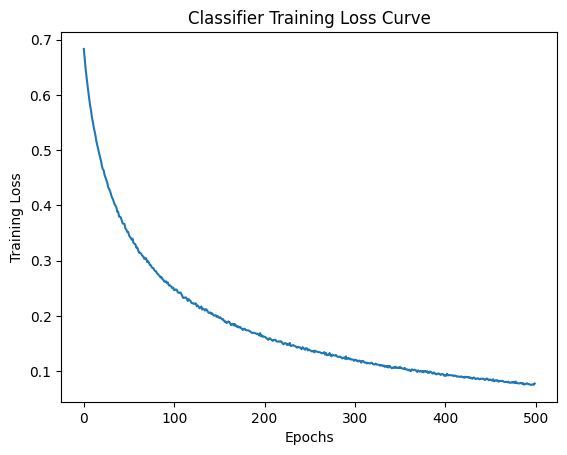

In [29]:
x = torch.arange(0, EPOCHS)
plt.plot(x, training_losses)
plt.title("Classifier Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

In [30]:
# evaluate the classifier's performance on the testing set using accuracy, precision, recall, and f1 score


def evaluate_classifier(classifier, test_loader):
    with torch.no_grad():
        # set the classifier on eval mode
        classifier.eval()

        preds = []
        targets = []

        for data, labels in test_loader:
            data = data.float()
            y = labels.data.long().tolist()
            y_pred = classifier(data)
            y_pred = torch.round(y_pred).long().tolist()

            # keep all target values in ground_truth list
            targets.extend(y)
            # keep all predicted values in preds list
            preds.extend(y_pred)

        # get accuracy, recall, precision, and f1_score
        acc = accuracy_score(targets, preds) * 100
        prec = precision_score(targets, preds) * 100
        recall = recall_score(targets, preds) * 100
        f1 = f1_score(targets, preds) * 100
        print(f"Accuracy = {acc:.2f}%")
        print(f"Precision = {prec:.2f}%")
        print(f"Recall = {recall:.2f}%")
        print(f"F1 Score = {f1:.2f}%")


evaluate_classifier(classifier, test_loader)

Accuracy = 96.20%
Precision = 94.30%
Recall = 98.51%
F1 Score = 96.36%


In [31]:
# save the min-max scaler and feature extractor (i.e., the countvectorizer)

# save feature extractor and scaler
joblib.dump(vectorizer, "vectorizer.joblib")
joblib.dump(min_max_scaler, "scaler.joblib")

['scaler.joblib']

In [32]:
# save pytorch model
torch.save(classifier.state_dict(), "classifier.pt")

# [Optional]:Deploying your model online for public use

There is also a streamlit_app.py file in this repository. If you wish to deploy your model for public use:

- you can create github account

- create a repository and upload your (this) code to github repo

- create streamlit cloud community account

- connect streamlit account with your github account.

- deploy your code to streamlit cloud [tutorial](https://streamlit.io/cloud)

- Now, you and anyone else can access and use your model. Congratulations!
